In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/udemy-courses/udemy_courses.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../input/udemy-courses/udemy_courses.csv')

In [4]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


no null values found

-----
### 3 : Take A Deeper Look At The Data : Cleaning 
    - unneccassery columns 
    - all null columns 
    - check column type 
    - find duplicates 
    - check null values ---> delete : file [mean - mod , median]
    - Categorical Columns : Relations

 - Null Values            -----> No 
 - Unneccasssry Columns   -----> url 
 - Categorical Columns.   -----> is_paid , level , subject

In [6]:
## Delete Url Column
df.drop('url',axis=1,inplace=True)

In [7]:
# Take Another Look
df.dtypes

course_id                int64
course_title            object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

In [8]:
# convert published_timestamp from object to datetime
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

In [9]:
## see sample of data
df.sample(10)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
1638,278948,Become a Professional Graphic Designer,True,35,3618,345,207,All Levels,20.5,2014-08-13 16:37:12+00:00,Graphic Design
1258,600486,Teoria Basica del Arte. Como Pintar Ilustracio...,True,20,5104,437,26,Beginner Level,1.0,2015-09-08 17:29:12+00:00,Graphic Design
1852,174562,Learn to Play Saxophone: Beginner to Pro in Un...,True,50,1213,158,77,Beginner Level,5.0,2014-03-03 19:36:23+00:00,Musical Instruments
470,1220862,The True ' Secret Sauce For Stock Market Succ...,True,200,23,2,30,All Levels,3.0,2017-06-11 16:01:03+00:00,Business Finance
2620,788514,Learn to use JSON,True,150,12838,96,22,Beginner Level,1.5,2016-03-11 18:30:18+00:00,Web Development
2015,1123250,Master Class Piano Techniques: Tips To EZ Coor...,True,95,2026,3,62,Intermediate Level,2.5,2017-03-09 16:25:04+00:00,Musical Instruments
2700,11475,Become a Certified Web Developer,True,100,26673,1090,185,All Levels,12.0,2011-12-20 15:29:25+00:00,Web Development
3233,446134,Ultimate Web Designer & Developer Course: Buil...,True,200,33788,4434,246,All Levels,32.5,2015-08-20 20:55:19+00:00,Web Development
584,1165780,Ratio analysis for bankers and credit analysts,True,20,1,0,13,Beginner Level,3.0,2017-04-12 16:55:26+00:00,Business Finance
1978,217978,ブルースギター入門,False,0,462,6,23,All Levels,3.5,2014-05-17 04:00:12+00:00,Musical Instruments


--------
## Visualize 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Paid And Free Courses')

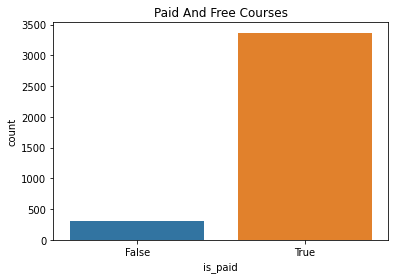

In [10]:
# free Vs Paid Courses 
sns.countplot('is_paid',data=df)
plt.title('Paid And Free Courses')

#### Result : Most Of The Courses Is Paid

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='level', ylabel='count'>

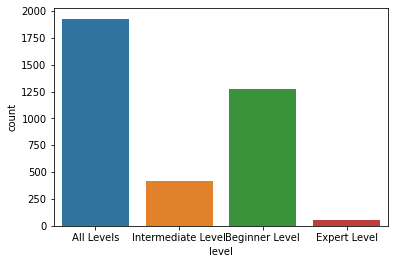

In [11]:
sns.countplot('level',data=df)

#### Result ---> Most Of The Courses are All Levels , Need More From Expert Level

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='subject', ylabel='count'>

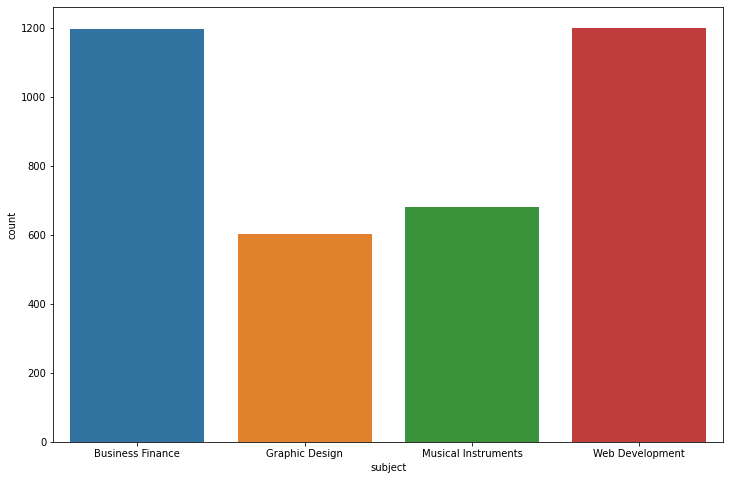

In [12]:
plt.figure(figsize=(12,8))
sns.countplot('subject',data=df)

#### Result --> Most Of Students care about Buisiness Finance & Web Development 

-------
## Find Relations Between Columns 

In [13]:
df.corr()

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration
course_id,1.000000,-0.013679,0.142319,-0.167856,-0.058550,-0.024646,-0.057223
is_paid,-0.013679,1.000000,0.328513,-0.266159,-0.087471,0.112574,0.094417
price,0.142319,0.328513,1.000000,0.050769,0.113696,0.330160,0.293450
num_subscribers,-0.167856,-0.266159,0.050769,1.000000,0.649946,0.157746,0.161839
num_reviews,-0.058550,-0.087471,0.113696,0.649946,1.000000,0.243029,0.228889
num_lectures,-0.024646,0.112574,0.330160,0.157746,0.243029,1.000000,0.801647
content_duration,-0.057223,0.094417,0.293450,0.161839,0.228889,0.801647,1.000000


<AxesSubplot:>

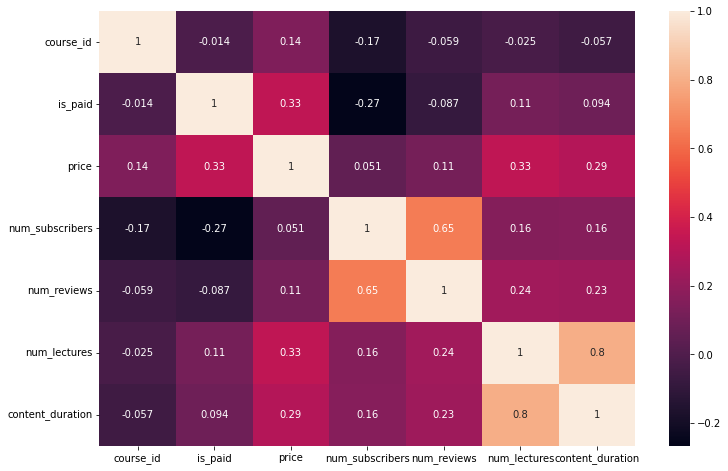

In [14]:
## See Correlation In Seaborn ColorMap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='price', ylabel='num_subscribers'>

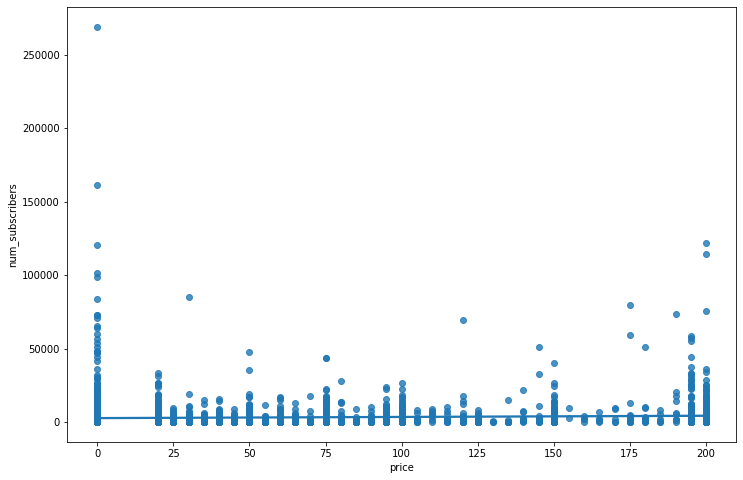

In [15]:
# visualize subscribers with price 
plt.figure(figsize=(12,8))
sns.regplot(x="price" , y="num_subscribers" , data=df)

#### Result ---> Course Price Does Not Affect Subscripers 

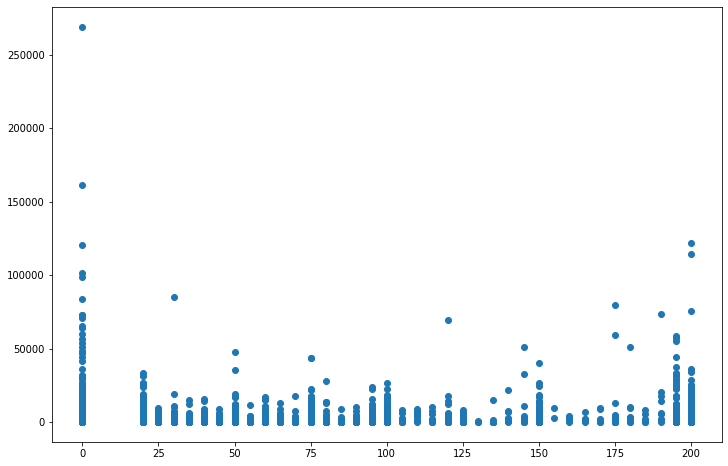

In [16]:
plt.figure(figsize=(12,8))
plt.scatter(df['price'],df['num_subscribers'])

<AxesSubplot:xlabel='price', ylabel='num_reviews'>

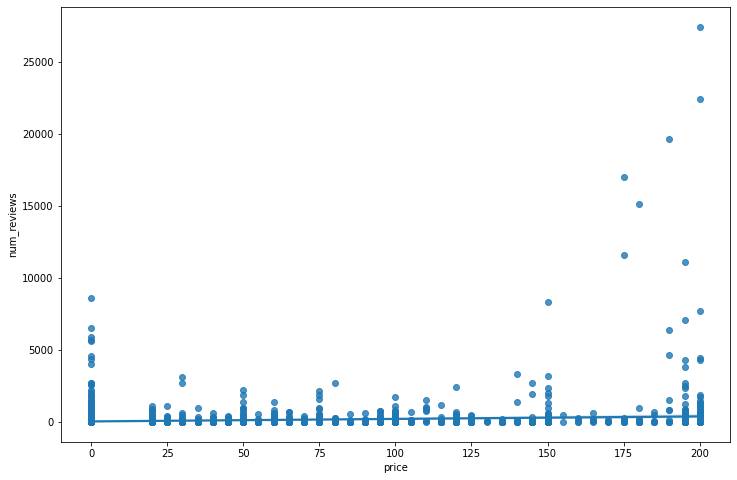

In [17]:
plt.figure(figsize=(12,8))
sns.regplot(x="price" , y="num_reviews" , data=df)

#### Result --> Price Does Not Affect Reviews

<AxesSubplot:xlabel='price', ylabel='content_duration'>

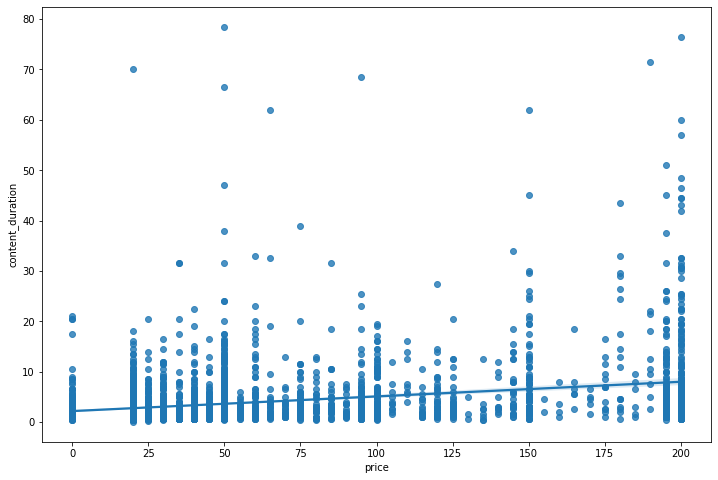

In [18]:
# price vs course duration
plt.figure(figsize=(12,8))
sns.regplot(x="price" , y="content_duration" , data=df)

#### Result --> Price Does Not Affect Course Duration 

<AxesSubplot:xlabel='num_subscribers', ylabel='content_duration'>

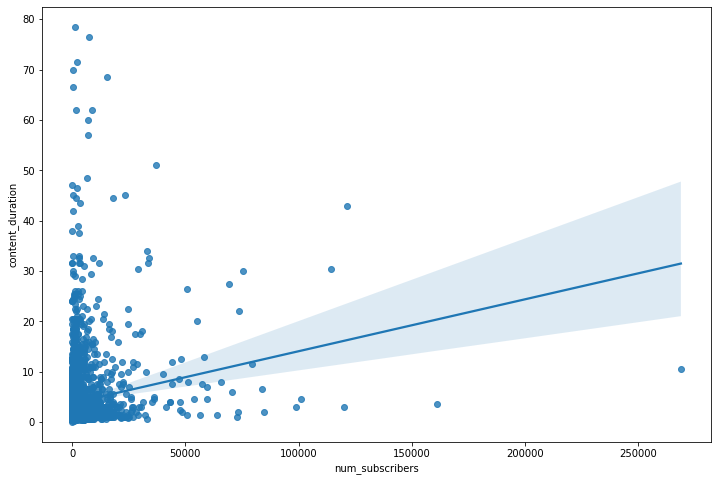

In [19]:
# course duration vs num of subscribers 
plt.figure(figsize=(12,8))
sns.regplot(x="num_subscribers" , y="content_duration" , data=df)

####  Result --> probaly course time affect course subscribers 

<AxesSubplot:xlabel='num_subscribers', ylabel='num_reviews'>

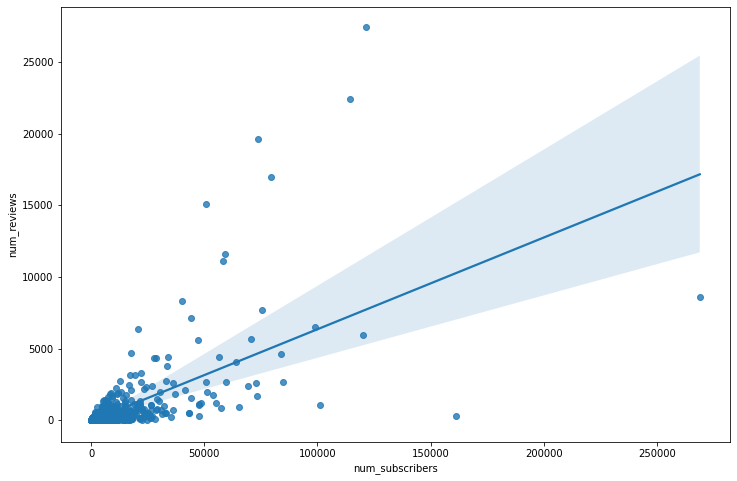

In [20]:
# num of subscribers vs num of reviews 
plt.figure(figsize=(12,8))
sns.regplot(x="num_subscribers" , y="num_reviews" , data=df)

#### Result ---> More Subscribers leads to more reviews

---
## Insights : 
    - Most Of The Courses Is Paid
    - Most Of The Courses are All Levels , Need More From Expert Level
    - Most Of Students care about Buisiness Finance & Web Development
    - Course Price Does Not Affect Subscripers
    - Price Does Not Affect Reviews
    - Price Does Not Affect Course Duration
    - probaly course time affect course subscribers
    - More Subscribers leads to more reviews